O relatório documenta a investigação realizada sobre 17 sensores distribuídos em 8 equipamentos, com o objetivo de detectar qual equipamento apresenta um possivel defeito. 
A tarefa da análise abrangente dos dados, utilizando métodos estatísticos e ferramentas computacionais para identificar padrões e correlações.
Para alcançar este propósito, foi empregada a biblioteca pandas do Python, notadamente a função 'corr' para calcular as correlações entre os diferentes sensores. Essa abordagem permitiu mapear as relações entre as variáveis monitoradas e, assim, destacar padrões que pudessem indicar anormalidades nos equipamentos. 
A visualização dessas correlações foi apresentada através da representação gráfica em um mapa de calor, oferecendo uma perspectiva intuitiva das interações entre os sensores.

O primeiro passo é importar as bibliotecas e carregar o arquivo em um dataframe:

In [1]:
import pandas as pd
import matplotlib.pyplot as plp

In [2]:
df = pd.read_excel('Defective_Equipment (rev 2024-02-21).xlsx')
df

,Seq,V1,V2,V3,V4,V5,V6,V7,V8
0,1,375,475,135,458,509,469,336,492
1,2,57,73,47,53,63,63,62,58
2,3,245,227,267,242,271,268,219,286
3,4,1472,1582,1494,1462,1613,1490,1323,1493
4,5,105,103,66,103,118,101,98,118
5,6,54,64,41,62,55,63,59,59
6,7,193,235,209,184,207,223,172,156
7,8,147,160,93,122,139,152,130,101
8,9,1102,1137,674,957,1058,1098,990,878
9,10,720,874,1033,566,628,706,646,320


Após a importação, fiz o tratamendo dos dados removendo qualquer dado que não importava.
No caso eu removi a coluna 'Seq' pois nela so há informações da sequencia do sensor, como não é uma informação relevante para minha análise eu a removi. 
Logo em sequencia a remoção da coluna 'Seq', eu realizei a correlação das variaveis
 a correlação é uma medida estatística que descreve a relação entre duas variáveis. A função corr retorna uma matriz de correlação, onde os valores na matriz indicam o grau de associação linear entre pares de colunas.

In [3]:
correlation = df.drop(axis=1, labels='Seq').corr()
correlation


,V1,V2,V3,V4,V5,V6,V7,V8
V1,1.000000,0.990654,0.947619,0.984917,0.985102,0.994283,0.999954,0.950215
V2,0.990654,1.000000,0.937061,0.964122,0.964438,0.975923,0.990426,0.917521
V3,0.947619,0.937061,1.000000,0.940742,0.940745,0.948130,0.947792,0.900400
V4,0.984917,0.964122,0.940742,1.000000,0.999965,0.995020,0.985104,0.987685
V5,0.985102,0.964438,0.940745,0.999965,1.000000,0.995116,0.985238,0.987497
V6,0.994283,0.975923,0.948130,0.995020,0.995116,1.000000,0.994309,0.970414
V7,0.999954,0.990426,0.947792,0.985104,0.985238,0.994309,1.000000,0.950647
V8,0.950215,0.917521,0.900400,0.987685,0.987497,0.970414,0.950647,1.000000


O Coeficiente de Correlação por Postos de Spearman, é uma medida não paramétrica da dependência dos postos das variáveis.

Este coeficiente também pode ser chamado de ρ (rho) de Spearman, rs de Spearman ou Correlação de Spearman. Como o nome já dá a entender, a correlação de Spearman descreve a relação entre as variáveis através de uma função monotética.

Isso significa, de maneira simplificada, que ele está analisando se, quando o valor de uma variável aumenta ou diminui, o valor da outra variável aumenta ou diminui.

fonte - https://psicometriaonline.com.br/o-que-e-correlacao-de-spearman/

Para uma análise mais fácil, representei graficamente a matriz de correlação usando gráficos com um mapa de calor.

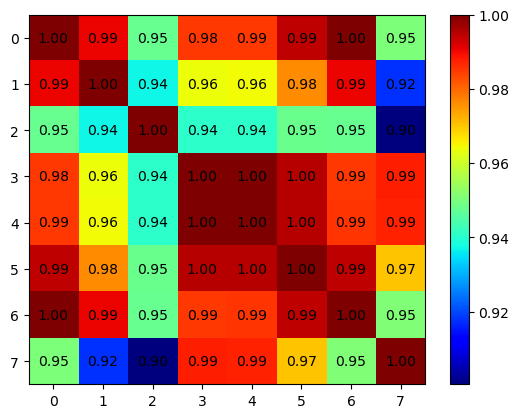

In [4]:
plp.imshow(correlation, cmap='jet', aspect='auto')
for i in range(len(correlation.index)):
    for j in range(len(correlation.columns)):
        text = plp.text(j, i, f'{correlation.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plp.colorbar()
plp.show()

Como da para ver claramente, o equipamento V3 (no grafico a linha e coluna 2) apresenta uma coloração significativamente diferente dos outros sensores de outros equipamento, onde pode indicar uma anomalia na leitura e possivelmente um defeito no equipamento. 

Em uma análise mais simples retirei a média de variação de cada equipamento e avaliei qual o equipamento que contém a menor media da variância.  Onde demonstrou de novo que o equipamento V3 apresenta uma media de correlações menor que os demais equipamentos

In [13]:
medias = correlation.mean(axis=1)
medias

V1    0.981593
V2    0.967518
V3    0.945311
V4    0.982194
V5    0.982263
V6    0.984149
V7    0.981684
V8    0.958047
dtype: float64

In [14]:
print('O Menor valor da médias das correlações dos sensores: \n', medias.idxmin(),'-', medias.min())

O Menor valor da médias das correlações dos sensores: 
 V3 - 0.945311119739958


Plotando o valor das médias das correlaões de cada equipamento conseguimos, de forma mais fácil, visualizar.
Nota-se, também, que o equipamento V8 e em seguida o V2 apresentam uma média das correlações menor, onde pode indicar um equipamento próximo à falha ao consideramos esse metodo de análise e dados.

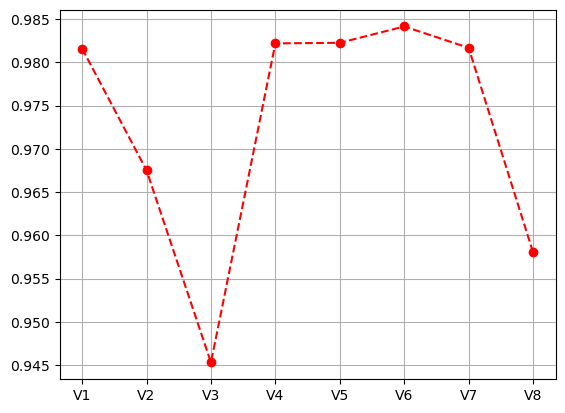

In [12]:
plp.grid(True)
plp.plot(medias,'ro',linestyle='dashed')